In [2]:
import re
import json
import json_repair
import pandas as pd
import pickle as pkl

from pathlib import Path
from pdb import set_trace

In [9]:
data_path = Path("../data/raw/framing_results/")    

In [10]:
def get_valid_json_list(data):
    out_list = []
    for i, out in enumerate(data):
        try:
            # Check if json is already valid within brackets
            basic_fix_str = out[out.index("{"):out.rindex("}")+1]
            basic_fix_str = basic_fix_str.replace("\n","")
            json_obj = json.loads(basic_fix_str)
            assert type(json_obj) == dict
            assert len(json_obj) == 2
        except:
            # Fix json
            try:
                json_obj = json_repair.loads(out)
                assert len(json_obj) == 2
                assert type(json_obj) == dict
            except:
                out_list.append({"error": "json_out_dict error"})
                continue
        assert type(json_obj) == dict
        out_list.append(json_obj)
    return out_list

In [ ]:
me_df = []
for i in range(1,len([*data_path.glob("UK*")])):
    data = pkl.load(open(data_path/f"UK_{i}.pkl", "rb"))
    print(len(data), end=",")
    me_df.extend(get_valid_json_list(data))

500,100,200,200,200,200,200,200,200,200,200,200,200,

In [13]:
len(me_df)

2800

In [14]:
me_list = []
for i, json_out in enumerate(me_df):
    json_out_list = list(json_out.values())
    try:
        json_out_dict = json_out_list[0] | json_out_list[1]
        assert len(json_out_dict) == len(json_out_list[0])+len(json_out_list[1])
        json_out_dict["index"] = i
    except:
        continue
    me_list.append(json_out_dict)

In [15]:
print(me_list[0].keys())

dict_keys(['adversarial_frame', 'focus_on_elites', 'labelling_of_people', 'language', 'partisan_framing', 'focus_on_visible_effects_of_war', 'nationalistic_frame', 'military_solution', 'peace_frame', 'focus_on_invisible_effects_of_war', 'peace_orientation', 'people_orientation', 'victim_orientation', 'index'])


In [16]:
me_df = pd.DataFrame(me_list)

In [17]:
valid_columns = []
df_len = len(me_df)
for col_name,col in me_df.items():
    if col.isna().sum() > 0.5*df_len:
        continue
    else:
        valid_columns.append(col_name)

In [18]:
me_df = me_df[valid_columns]

In [19]:
me_df

,adversarial_frame,focus_on_elites,labelling_of_people,language,partisan_framing,focus_on_visible_effects_of_war,nationalistic_frame,military_solution,peace_frame,focus_on_invisible_effects_of_war,peace_orientation,people_orientation,victim_orientation,index
0,{'use_of_adversarial_language': [['clashes nea...,[The article primarily focuses on the statemen...,[[referring to 'the Jewish community' and 'Mus...,{'demonizing_language': [['referring to Hamas ...,[[Albanese accusing Dutton of 'weaponising ant...,[The article mentions clashes near a synagogue...,{'emphasis_on_national_interests': [['Albanese...,[[Albanese stating that Hamas is not a partner...,{'focus_on_consequences_of_conflict': [['MPs e...,[[Zoe Daniel expressing concern about the risi...,[[Albanese discussing the postwar future of Ga...,[[Zoe Daniel expressing concern about civilian...,[[Zoe Daniel expressing concern about antisemi...,0
1,{'attribution_of_blame': [['lockdowns limited ...,"[Michael O’Leary, Ryanair’s chief executive, N...",[],"{'demonizing_language': [], 'dehumanizing_lang...",[],[],"{'emphasis_on_national_interests': [], 'portra...",[],{'focus_on_consequences_of_conflict': [['Ukrai...,[],[],[],[],2
2,{'use_of_adversarial_language': [['Labour’s wo...,"[Keir Starmer, Rishi Sunak, Boris Johnson, Sir...","[[right-wing party, Reform UK, Uses a label th...","{'demonizing_language': [], 'dehumanizing_lang...",[[the Tories were “staring defeat in the face ...,[],"{'emphasis_on_national_interests': [], 'portra...",[],"{'focus_on_consequences_of_conflict': [], 'inc...",[],[],"[[voters, Focus on the actions and opinions of...",[],3
3,{'use_of_adversarial_language': [['anti-Semiti...,[English Defence League founder Tommy Robinson...,[[English Defence League founder Tommy Robinso...,{'demonizing_language': [['anti-Semitic banner...,[[English Defence League founder Tommy Robinso...,[434 people have been arrested for a range of ...,{'emphasis_on_national_interests': [['The marc...,[The march came after 18 demonstrators were ar...,{'focus_on_consequences_of_conflict': [['The o...,[[The ongoing conflict in the Middle East cont...,[[a separate rally calling for a permanent cea...,[[a journalist and her colleagues were harasse...,[[The ongoing conflict in the Middle East cont...,4
4,{'use_of_adversarial_language': [['Israeli for...,"[Israeli Prime Minister Benjamin Netanyahu, Is...","[[Hamas militants, Hamas, Labels Hamas members...","{'demonizing_language': [['crush Hamas', 'Hama...",[[Israel vows to crush Hamas after its Oct. 7 ...,[[one of the most devastating military campaig...,{'emphasis_on_national_interests': [['Israel v...,[[Israel has vowed to continue fighting to eli...,{'focus_on_consequences_of_conflict': [['Despi...,[[The children are terrified. We are terrified...,"[[international pressure for a cease-fire, Int...","[[More than 20,600 Palestinians, two-thirds of...","[[More than 20,600 Palestinians, two-thirds of...",5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2487,{'use_of_adversarial_language': [['Gay sparked...,"[Harvard president Claudine Gay, Gay's remarks...","[['antisemitic scandal', Gay's comments, The l...",{'demonizing_language': [['Gay sparked widespr...,[[Harvard president Claudine Gay has finally i...,[Footage shared to social media appearing to s...,{'emphasis_on_national_interests': [['The Whit...,NaN,{'focus_on_consequences_of_conflict': [['Amid ...,[['It was an opportunity to just convey the de...,[['Let me be clear: Calls for violence or geno...,[[The hearing also saw widely criticized testi...,"[[Amid national outrage, Gay issued a highly c...",2794
2488,{'use_of_adversarial_language': [[''politicisi...,"[Carla Efstratiou, a social media commentator ...","[['woke' presenters, Presenters with perceived...","{'demonizing_language': [], 'dehumanizing_lang...",[[Carla Efstratiou... said it was inevitable t...,[],{'emphasis_on_national_interests': [['Sydney L...,[],{'focus_on_consequences_of_conflict': [[''[The...,[['[T

In [22]:
all_me = pd.read_csv("../data/raw/framing_results/selected_MiddleEast.csv")

In [24]:
# reset me_df index, using index column and concatenate the dataframes me_df and me based on the index 
me_df.reset_index()
me_df = me_df.rename(columns={"index": "index"})
me_df = me_df.set_index("index")

In [25]:
# select the rows from all_me with index values same as the index values in me_df 
all_me_new = all_me.loc[me_df.index]
# concatenate all_me_new with me_df
all_me_new_df = pd.concat([all_me_new, me_df], axis=1)

In [26]:
all_me_new_df.shape

(2492, 23)

In [27]:
all_me_new_df.columns

Index(['description', 'maintext', 'source_domain', 'title', 'url', 'language',
       'date_publish', 'region', 'title_len', 'text_len', 'adversarial_frame',
       'focus_on_elites', 'labelling_of_people', 'language',
       'partisan_framing', 'focus_on_visible_effects_of_war',
       'nationalistic_frame', 'military_solution', 'peace_frame',
       'focus_on_invisible_effects_of_war', 'peace_orientation',
       'people_orientation', 'victim_orientation'],
      dtype='object')

### War journalism indicators

In [128]:
from collections import Counter

war_indicators = all_me_new_df[['adversarial_frame',
       'focus_on_elites', 'labelling_of_people', 'language',
       'partisan_framing', 'focus_on_visible_effects_of_war',
       'nationalistic_frame', 'military_solution']] 
peace_indicators = all_me_new_df[['peace_frame', 'focus_on_invisible_effects_of_war', 'people_orientation', 'victim_orientation']]


def recursive_count(data):
    if isinstance(data, list):
        if not data:
            return 0
        if isinstance(data[0], str):
            return len(data)
        elif isinstance(data[0], list):
            count = 0
            for value in data:
                sub_value = recursive_count(value)
                count += sub_value
            return count
    elif isinstance(data, dict):
        count = 0
        for _, value in data.items():
            sub_value = recursive_count(value)
            count += sub_value
        return count
    elif isinstance(data, pd.Series):
        value = data.values[1]
        return recursive_count(value)
    elif pd.isna(data):
        return 0
    elif isinstance(data, str):
        return 1
    else:
        print(f"Unknown data type: {type(data)}")
        set_trace()
    return 0
        
def flatten_and_count(df):
    result_list = []
    result_count_list = []
    for _, row in df.iterrows():
        result = {}
        for col_name, col_value in dict(row).items():
            result[col_name] = recursive_count(col_value)
        result_list.append(result)
        result_count = sum(result.values())
        result_count_list.append(result_count)
    return result_list, result_count_list

In [129]:
war_indicator_list, war_indicator_count = flatten_and_count(war_indicators)

In [130]:
war_indicators['indicators_flattened'] = war_indicator_list
war_indicators['indicators_count'] = war_indicator_count
war_indicators

/var/folders/v4/1f9w3z693hv5dk6wxj46w3y80000gn/T/ipykernel_80748/3860104301.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  war_indicators['indicators_flattened'] = war_indicator_list
/var/folders/v4/1f9w3z693hv5dk6wxj46w3y80000gn/T/ipykernel_80748/3860104301.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  war_indicators['indicators_count'] = war_indicator_count


,adversarial_frame,focus_on_elites,labelling_of_people,language,language,partisan_framing,focus_on_visible_effects_of_war,nationalistic_frame,military_solution,indicators_flattened,indicators_count
index,,,,,,,,,,,
0,{'use_of_adversarial_language': [['clashes nea...,[The article primarily focuses on the statemen...,[[referring to 'the Jewish community' and 'Mus...,en,{'demonizing_language': [['referring to Hamas ...,[[Albanese accusing Dutton of 'weaponising ant...,[The article mentions clashes near a synagogue...,{'emphasis_on_national_interests': [['Albanese...,[[Albanese stating that Hamas is not a partner...,"{'adversarial_frame': 12, 'focus_on_elites': 1...",53
2,{'attribution_of_blame': [['lockdowns limited ...,"[Michael O’Leary, Ryanair’s chief executive, N...",[],en,"{'demonizing_language': [], 'dehumanizing_lang...",[],[],"{'emphasis_on_national_interests': [], 'portra...",[],"{'adversarial_frame': 9, 'focus_on_elites': 4,...",13
3,{'use_of_adversarial_language': [['Labour’s wo...,"[Keir Starmer, Rishi Sunak, Boris Johnson, Sir...","[[right-wing party, Reform UK, Uses a label th...",en,"{'demonizing_language': [], 'dehumanizing_lang...",[[the Tories were “staring defeat in the face ...,[],"{'emphasis_on_national_interests': [], 'portra...",[],"{'adversarial_frame': 15, 'focus_on_elites': 4...",33
4,{'use_of_adversarial_language': [['anti-Semiti...,[English Defence League founder Tommy Robinson...,[[English Defence League founder Tommy Robinso...,en,{'demonizing_language': [['anti-Semitic banner...,[[English Defence League founder Tommy Robinso...,[434 people have been arrested for a range of ...,{'emphasis_on_national_interests': [['The marc...,[The march came after 18 demonstrators were ar...,"{'adversarial_frame': 17, 'focus_on_elites': 2...",68
5,{'use_of_adversarial_language': [['Israeli for...,"[Israeli Prime Minister Benjamin Netanyahu, Is...","[[Hamas militants, Hamas, Labels Hamas members...",en,"{'demonizing_language': [['crush Hamas', 'Hama...",[[Israel vows to crush Hamas after its Oct. 7 ...,[[one of the most devastating military campaig...,{'emphasis_on_national_interests': [['Israel v...,[[Israel has vowed to continue fighting to eli...,"{'adversarial_frame': 24, 'focus_on_elites': 3...",99
...,...,...,...,...,...,...,...,...,...,...,...
2794,{'use_of_adversarial_language': [['Gay sparked...,"[Harvard president Claudine Gay, Gay's remarks...","[['antisemitic scandal', Gay's comments, The l...",en,{'demonizing_language': [['Gay sparked widespr...,[[Harvard president Claudine Gay has finally i...,[Footage shared to social media appearing to s...,{'emphasis_on_national_interests': [['The Whit...,NaN,"{'adversarial_frame': 21, 'focus_on_elites': 5...",85
2795,{'use_of_adversarial_language': [[''politicisi...,"[Carla Efstratiou, a social media commentator ...","[['woke' presenters, Presenters with perceived...",en,"{'demonizing_language': [], 'dehumanizing_lang...",[[Carla Efstratiou... said it was inevitable t...,[],{'emphasis_on_national_interests': [['Sydney L...,[],"{'adversarial_frame': 30, 'focus_on_elites': 5...",84
2797,{'attribution_of_blame': [['growing fear that ...,"[Jane Corbin investigates, Jane Corbin, a vete...","[[X user, Users of the platform are labeled wi...",en,{'demonizing_language': [['growing fear of Wor...,"[[conflicts could spiral into World War 3, Glo...",[The documentary investigates the potential fo...,{'emphasis_on_national_interests': [['Britain ...,[The documentary focuses on the potential for ...,"{'adversarial_frame': 6, 'focus_on_elites': 4,...",45


In [131]:
peace_indicator_list, peace_indicator_count = flatten_and_count(peace_indicators)
peace_indicators['indicators_flattened'] = peace_indicator_list
peace_indicators['indicators_count'] = peace_indicator_count
peace_indicators

/var/folders/v4/1f9w3z693hv5dk6wxj46w3y80000gn/T/ipykernel_80748/2687961919.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  peace_indicators['indicators_flattened'] = peace_indicator_list
/var/folders/v4/1f9w3z693hv5dk6wxj46w3y80000gn/T/ipykernel_80748/2687961919.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  peace_indicators['indicators_count'] = peace_indicator_count


,peace_frame,focus_on_invisible_effects_of_war,people_orientation,victim_orientation,indicators_flattened,indicators_count
index,,,,,,
0,{'focus_on_consequences_of_conflict': [['MPs e...,[[Zoe Daniel expressing concern about the risi...,[[Zoe Daniel expressing concern about civilian...,[[Zoe Daniel expressing concern about antisemi...,"{'peace_frame': 18, 'focus_on_invisible_effect...",36
2,{'focus_on_consequences_of_conflict': [['Ukrai...,[],[],[],"{'peace_frame': 3, 'focus_on_invisible_effects...",3
3,"{'focus_on_consequences_of_conflict': [], 'inc...",[],"[[voters, Focus on the actions and opinions of...",[],"{'peace_frame': 3, 'focus_on_invisible_effects...",5
4,{'focus_on_consequences_of_conflict': [['The o...,[[The ongoing conflict in the Middle East cont...,[[a journalist and her colleagues were harasse...,[[The ongoing conflict in the Middle East cont...,"{'peace_frame': 19, 'focus_on_invisible_effect...",36
5,{'focus_on_consequences_of_conflict': [['Despi...,[[The children are terrified. We are terrified...,"[[More than 20,600 Palestinians, two-thirds of...","[[More than 20,600 Palestinians, two-thirds of...","{'peace_frame': 21, 'focus_on_invisible_effect...",44
...,...,...,...,...,...,...
2794,{'focus_on_consequences_of_conflict': [['Amid ...,[['It was an opportunity to just convey the de...,[[The hearing also saw widely criticized testi...,"[[Amid national outrage, Gay issued a highly c...","{'peace_frame': 21, 'focus_on_invisible_effect...",42
2795,{'focus_on_consequences_of_conflict': [[''[The...,[['[The] 9pm Calling Country fireworks were al...,[['Just show us the fireworks. Show us some pa...,"[['We don't need woke presenters, we don't nee...","{'peace_frame': 27, 'focus_on_invisible_effect...",51
2797,{'focus_on_consequences_of_conflict': [['inves...,"[[the impending sense of doom, People, The quo...","[[viewers reacted in horror, Viewers, The arti...","[[pointless fear mongering, Viewers, The accus...","{'peace_frame': 9, 'focus_on_invisible_effects...",27


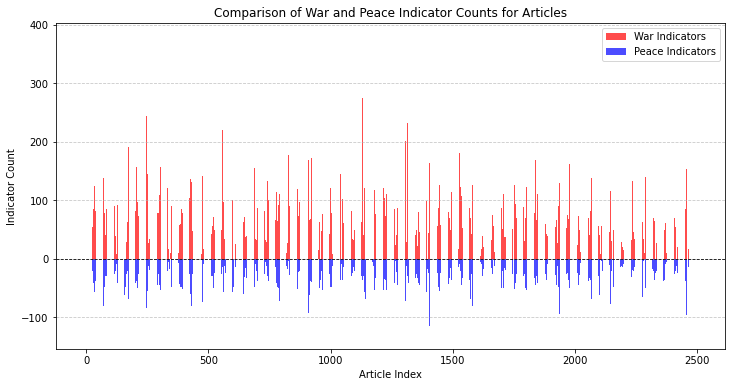

In [132]:
import numpy as np
import matplotlib.pyplot as plt

# Create a bar plot to contrast war and peace indicator counts
indices = np.arange(len(war_indicator_count))  # Indices for the articles
width = 0.4  # Width of the bars

plt.figure(figsize=(12, 6))
plt.bar(indices, war_indicator_count, width, label='War Indicators', color='red', alpha=0.7)
plt.bar(indices, [-count for count in peace_indicator_count], width, label='Peace Indicators', color='blue', alpha=0.7)

# Add labels and title
plt.xlabel('Article Index')
plt.ylabel('Indicator Count')
plt.title('Comparison of War and Peace Indicator Counts for Articles')
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # Add a horizontal line at y=0
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


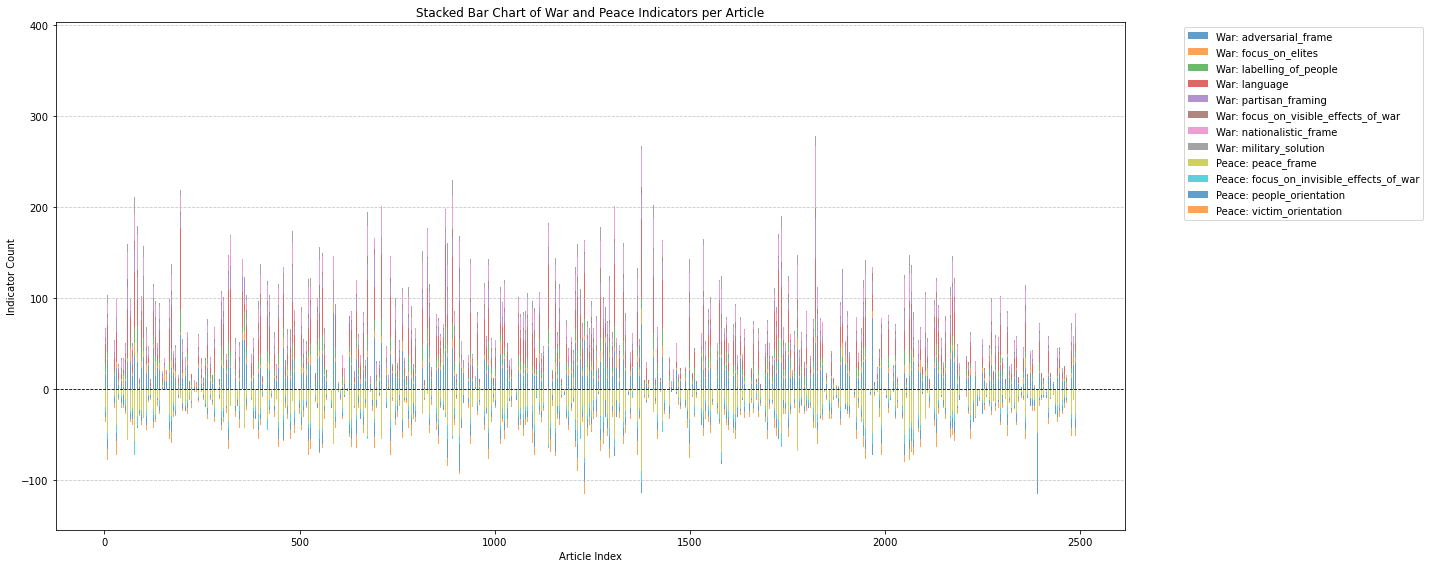

In [133]:
# Extract the keys for war and peace indicators
war_keys = list(war_indicator_list[0].keys())
peace_keys = list(peace_indicator_list[0].keys())

# Prepare data for plotting
indices = np.arange(len(war_indicator_list))  # Indices for the articles

# Initialize the figure
plt.figure(figsize=(20, 8))

# Plot war indicators as stacked bars
bottom_war = np.zeros(len(war_indicator_list))
for key in war_keys:
    values = [item[key] for item in war_indicator_list]
    plt.bar(indices, values, width, bottom=bottom_war, label=f'War: {key}', alpha=0.7)
    bottom_war += values

# Plot peace indicators as stacked bars (negative values for bottom stacking)
bottom_peace = np.zeros(len(peace_indicator_list))
for key in peace_keys:
    values = [-item[key] for item in peace_indicator_list]
    plt.bar(indices, values, width, bottom=bottom_peace, label=f'Peace: {key}', alpha=0.7)
    bottom_peace += values


# Add labels and title
plt.xlabel('Article Index')
plt.ylabel('Indicator Count')
plt.title('Stacked Bar Chart of War and Peace Indicators per Article')
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # Add a horizontal line at y=0
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Show the plot
plt.tight_layout()
plt.show()